## Introduction

These relatively brief notes contain an overview of the Jupyter Notebook environment, and include the content that was coded live in class on Wednesday, 1/24.  Because much of the tutorial regarding the notebook is not well suited to static presentation on web pages, it is recommended that you watch the video lecture and follow along in the notebook, rather than solely rely on these notes.  In addition, unlike the majority of the notes for this class (which are written in Jupyter Notebook, but then exported to Markdown for presentation on the class website), I am going to leave these notes in Jupyter notebook form, to emphasize the fact that you can download and step through the examples here. 

## Overview of Jupyter Notebook

Jupyter Notebook is a browser-based coding environment, used extensively for prototyping and interactive development in data science applications.  Jupyter Notebook is an evolution of an older project called the IPython Noteboook (this is the origin of the notebook file extension ".ipynb"), and while (as the name suggests) Jupyter Notebook supports languages other than Python, at the current time Python is by far the most common language for these notebook.  General information about Jupyter Notebook and related projects can be found at the [Jupyter project page](http://jupyter.org).

The central unit within a Jupyter Notebook are "cells".  These cells can be either contain code or Markdown (a simple formatting language, which can also include things like LaTeX equations).  The dropdown menu at the top of the screen indicates the type of the current cell.  

Code cells can be executed by pressing the <i class="fa fa-step-forward"></i> button at the top of the notebook, or more commonly via the commands Shift-Enter (execute and move to the next cell) or Control-Enter (execute and stay on that cell).  All Python code is executed in a single running Python environment, called the "Kernel" in Jupyter notebook.  Variables are shared across all cells, and the code is executed in the order in which the cells are run (not necessarily sequential in the notebook), which can get your notebook into rather confusing states if you don't always execute cells in order.

Let's look at a a few examples.

In [0]:
1+2

3

In [0]:
a = 1.0
b = 2.0

In [0]:
print(a)
b

1.0


2.0

In [0]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


Any `print` statements will print to the output section for the cell, and the output will also contain the string representation of the object returned by the last line in the cell.  Thus, in the above setting where the variable `b` appears on the last line of the cell, its content is printed at the end of the cell output, following any previous print statements that happen before.

Any Python code will be valid in these cells, so we can import external libraries, defines classes, and functions, etc.

In [0]:
import requests

In [0]:
def square(x):
    """Square the input x"""
    n= x * x * x
    return n

In [0]:
square(4)

64

### Efficient navigation in the notebook

Because you'll be spending a lot of timing writing code in the notebook, it helps to become at least a little bit familiar with the features of the editor.  While the notebook in many ways makes a poor actual code editing environment (compared to more fully featured editors ranging from Sublime, vi, Emacs, Atom, etc), it's not that bad if you familiarize yourself with some of the keyboard shortcuts.

You can look up all the keyboard shortcuts (in addition to adding your own) in the "Help -> Keyboard Shortcuts" menu, but some of the more common ones I use are the following.  First, though, it is important to distinguish between the "edit mode" (when directly editing a cell) and "command mode" (navigating over cells).  You can switch between these using "ESC" or "Ctrl-M" (switch to command mode) and "Enter" (switch to edit more).

Common keyboard shortcuts in command mode:
- "x": delete a cell (though be careful, because you can only undo the deletion of one cell)
- "a": insert new cell above
- "b": insert new cell below
- "m": convert cell to Markdown
- "y": convert cell to code
- Up/down: navigate up and down over cells
- Shift-Enter, Ctrl-Enter: execute cell (also works in edit mode)

Common shortcuts in edit mode:
- Ctrl-up/Ctrl-down: move to start/end of cell
- Tab: indent selected area (when text is selected) or autocomplete (when editing in the middle of a line)
- Shift-Tab: unindent selected area (when text is selected), get function help (when following a function name)
- Command-/: toggle comment/uncommand selected region

The best way to familiarize yourself with these commands is to try to use the notebook entirely without using the mouse.  In practice, you'll often rely on the mouse for some things (for instance, I prefer to have commands like restarting the kernel require a mouse click), but trying to avoid it for some time will get you familiar enough with the common commands to be fairly productive in the Notebook editing environment.

### Getting help

This was touched upon in the previous list of commands, but is important enough to warrant further discussion.  One of the nicer elements of the notebook editor is it's built-in support for code autocompletion and function lookup.  After writing some portion of code, you can press the "tab" key to autocomplete: if there is only one viable completion of the word you are currently typing, it will simply complete the word.  If there are multiple viable predictions, then it will open a popup menu where you can view all possible completions.  The later is useful for quickly browsing through all functions or variables in a library/object.

The second useful command is the inline help popup.  After typing a function name, you can get help for that function by pressing "Shift-Tab".  This will bring up a popup with a brief description of the function.  If you want additional help, it may be available for some functions by clicking the <i class="fa fa-chevron-up"></i> button in the top right of the help popup.

### Cell magics

In addition to running Python code, the Jupyter Notebook has some built-in routines for performing operations outside of Python, timing or analyzing code runs, etc.  These "cell magics" are prefaced by `%` (at the beginning of a line ... this is technically called a "line magic", but I usually see both cases referred to as cell magics) for single-line magics and `%%` at the beginning of a cell for whole-cell magics.  We won't cover very many of these, but some are very useful and so you should be familiar with the basics.  A much more exhaustive list of cell magics is here: [Built-in cell magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html).

- Time operations with `%timeit` (for single line), `%%timeit` (for the whole cell).  This command will run the line or cell _multiple_ times and provide average timing.  It is adaptive, so that operations that take less time are run more often, so as to provide a better estimate of the run time (thus, the time it takes to run run this command is not indicative of the actual time it takes to run the code.  If you want to just time a single pass, using `%time` or `%%time`.

In [0]:
%time sum(x**2 for x in range(10000))

CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 3.81 ms


333283335000

- Execute bash commands with `%%bash`.  Use this very sparingly, as it effectively executes shell commands outside the actual notebook environment, and makes the notebook potentially platform-dependent.

In [0]:
%%bash
ls

sample_data


- Profile a function line-by-line with line profiler (may require that you install the necessary pip packages depending on whether it's included in your distribution or not).  Note that we need to call the additional magic command `%load_ext` to load this extension.

In [0]:
%load_ext line_profiler

In [0]:
def function_to_profile():
    print(sum(x**2 for x in range(1000)))
    print(sum(x**3 for x in range(10000)))
    
%lprun -f function_to_profile function_to_profile()

332833500
2499500025000000


## Python-specific features for Practical Data Science

In the remainder of this notebook (which as you go through it, should serve both as an illustration of some concepts in the Notebook, and a brief highlight of some of the relevant Python concepts we'll use frequently throughout this course.  Importantly, these notes are not meant to be a general tutorial on Python, which you are already expected to be familiar with.  If any of the basic Python concepts here seem difficult, we recommend you consult a standard [Python Tutorial](https://docs.python.org/3/tutorial/).  

The most common "built in" data types you will interact with when doing data science work at lists and dictionaries (there are of course additional types like Numpy Arrays, Pandas Dataframes, and others, but these are provided by external libraries).  It's good to have a brief understanding of how to use these data structures effectively.

### Lists

Lists are denoted by items within square brackets.

In [0]:
list1 = ["a", "b", "c", "d"]
list2 = [1, 2, 3, "4", [1,2]]

Items within a list can be accessed via several types of indexing: indexing to a given element, negative indexing (backward from the end of a list), and slice-based indexing that returns subsets of the list.

In [0]:
print(list1[0])

In [0]:
print(list1[-1])
print(list1[1:2])
print(list1[0:4:2])
for a in list1:
    print(a)

a
d
['b']
['a', 'c']
a
b
c
d


### List comprehensions

One slightly less well-known construct that I use extremely frequently (so it may come up in both sample code and homework code), is the list comprehension.  Briefly, this a method for constructing a list by iterating over another list.  Let's suppose we wanted to create a `list3` object that included every element from `list1`, but with an underscore after each string.  We could do it by explicitly constructing the list and adding each element, like so.

In [0]:
list3 = []
for x in list1:
    list3.append(x + "_")
list3

['a_', 'b_', 'c_', 'd_']

However, this quickly gets verbose, if we want to create several new lists this way.  We could get this same result through a list comprehension, which has the syntax `[some_expression(item) for item in list]`, and returns a new list by applying `some_expression` (not necessarily an actual function, just some expression that involves `item`) to each element of the list.

In [0]:
list3 = [x + "_" for x in list1]
list3

['a_', 'b_', 'c_', 'd_']

As a slightly more complex example, let's use list comprehensions to count the number of words in a file.  The "shakespeare.txt" file included with this notebook contains test for all the collected works of Shakespeare.  Let's first read all the lines of Shakespeare into a file.

In [0]:
with open("shakespeare.txt") as f:
    lines = f.readlines()

Now let's use a list comprehension to count the number of words in each line (given by `len(line.split())`, which splits the line by the space character), and then compute the sum of this whole list.

In [0]:
sum([len(line.split(" ")) for line in lines])

815988

As a final node, if our only goal is to sum up the total number of words (rather than explicitly create the list containing the number of words in each line), we can omit the brackets from the call above, which creates what is called a _generator expression_.  This is like a list comprehension except that it doesn't actually instantiate the new list: it simply generates each element one at a time and (in this case) passes each to the `sum()` function.

In [0]:
sum(len(line.split(" ")) for line in lines)

NameError: ignored

### List implmentation internals

As a final note about lists, it is important for creating efficient Python code to understand a little bit about the nature of how lists are implemented internally.  Python lists are not really "lists" in the typical CS sense of the word, i.e., they are not linked lists or some structure like this.  Instead, a Python list is really a _dynamically sized array_.  That is, a list is an array of fixed-size elements (more precisely, it is an array of abstract "Python Object" elements, which in turn point to numbers, strings, other arrays, etc, while having the actual array elements in the list be fixed size).  The arrays are pre-allocated to have a certain amount of "extra elements" that can be used to add new items to the list; if we want to append a new item to the list, and do not have enough room in the underlying array, it is resized with some additional buffer (for example, the underlying size could be doubled ... though in reality Python uses a slightly more involved growth algorithm than just doubling each time) to allow for the additional elements.  Because this resizing happens relatively infrequently, it does not cost much from a computational perspective.  Put in big O notation, the following operations are lists are all constant time:

- Append: O(1) (average case)
- Lookup: O(1)
- Delete last element: O(1)

On the other hand, if you attempt to insert a new element somewhere in the middle of the list (shifting down later element), or delete an item in the middle of the list (shifting up later elements), these operations are expensive, because we need to copy every single item in the list after the inserted or deleted item, and move it in memory.  In big O notation, the following operations take linear time:

- Insert element at arbitrary position: O(n)
- Delete element at arbitrary position: O(n)

As an illustration of this, let's consider two versions of code that creates an array, either by appending or inserting (at the beginning of the list) new elements:

In [0]:
%%timeit
all_words = []
for line in lines[:10000]:
    for word in line.split():
        all_words.insert(0, word)

1.84 s ± 359 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [0]:
%%timeit
all_words = []
for line in lines[:10000]:
    for word in line.split():
        all_words.append(word)

13.1 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The second version is about 100x faster than the first.  This type of speed difference can be crucial when you write data processing loops.

A good page with further explanation about the internals of Python lists here (more technical than you need for this class certainly, but for those who are curious): [Python list implementation](https://www.laurentluce.com/posts/python-list-implementation/).

### Dictionaries

The next main built in data type you'll use in data science is the dictionary.  Dictionaries are mappings from keys to values, where keys can be any "immutable" Python type (most commonly strings, numbers, booleans, tuples ... but importantly _not_ lists or other dictionaries), and values can be any python type (including lists or dictionaries).

Dictionaries can be created with curly brackets, like the following:

In [0]:
dict1 = {"a":1, "b":2, "c":3}

And then elements are accessed by square brackets.

In [0]:
dict1["a"]

1

Unlike lists, dictionaries can't be indexed by slices, or negative indexing, or anything like that.  The keys in a dictionary are treated as _unordered_, so there is no notion to sequence in the items of a dictionary.  We can use the same notation to assign new elements to the dictionary.

In [0]:
dict1["d"] = 4

Note that we can make this call even though `dict["d"]` previously did not contain anything (and if we try to just execute this statement, it will throw an exception).  You can also check for a key belonging to a dictionary with the command:

In [0]:
"a" in dict1

True

Finally, there is the analogue to list comprehensions: dictionary comprehensions.  These are specified similar to a list comprehension, but are denoted by the syntax `{key(item) : value(item) for item in list}`.

In [0]:
{i:i**2 for i in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

### Dictionary internals

Internally, dictionaries are represented using _hash tables_.  That is, the dictionary elements are all contained in a relatively small array.  When inserting a new element in the dictionary, we compute a _hash_ of the key, and modulo this number by the size of the array.  If that location in the underlying array is empty, we store the key/value pair at that index.  The the location is already with note _different_ element (which has to be possible, since there are more possible keys than the size of the underlying array) we execute what is called a "probing strategy" to find the next free slot.  The details of the hashing function and probing strategy aren't important (some info is on the page linked below), but the key portions are that the process is deterministic, so we can easily both assign elements and look up elements by key (similarly computing the hash and probing until the key at the location matches the key we are looking for ... note that this is why we need to store both the key _and_ value in the array).

A good hash function will tend to generate "random" locations in the array, so there is a high probably we will find an empty slot without too many probing iterations.  In Python, once the array is 2/3 full, we double (or quadruple, for small-sized dictionaries) the size of the underlying array, and rebuild the hash table (which is required, since the location of different key/values pairs now changes for a different size of underlying array).  Just like with a list, although this rebuilding operation is slow, because it happens relatively infrequently, it does not end up costing too much time.  In big O notation, the operations of a dictionary all have (average case) constant time:

- Insert new element: O(1)
- Lookup element: O(1)
- Delete element: O(1)

More information about dictionary internals is here: [Python dictionary implementation](https://www.laurentluce.com/posts/python-dictionary-implementation/)

### Classes

Although this section will not describe it in any detail, it will also be necessary to be familiar with classes in Python.  We will just mention a few notes about classes here, using this example:

In [0]:
class MyClass:
    def __init__(self, n):
        self.n = n
    
    def get_n(self):
        return self.n

a = MyClass(1)
a.get_n()

1

The first note is that all functions within a Python class take an instance of that class as the first argument, usually named `self` in implementations (but it can be named anything).  Class methods and static methods (see the discussion in the list below) behave differently, but we won't be using those features much in this class.  The second thing of some importance is that unlike other object-oriented languages, Python does not actually have a distinction between "public" and "private" variables.  Although here it seems like the "n" variable should be private (inaccessible outside the class), and only accessible via the method `get_n()`, we can just as easily access it directly.

In [0]:
a.n

1

This means that Python doesn't really respect the traditional object-oriented abstractions (they are more just rules of thumb, that can be overridden by any code that wants to).  Be careful of this fact if you're used to classes in more structured languages like C++ or Java.

## Visualizations in notebook (preview)

While we are going to have an entire lecture on visualization, much of which will come with examples on how to generate visualizations in the notebook, I want to give a quick preview here of how we can generate figures inline in the notebook.  The "magic" commands here are the following, first to import a relevant plotting library, then a cell magic command that instructs Jupyter to plot figures in the notebook.

In [0]:
import matplotlib.pyplot as plt
%matplotlib notebook

Now let's plot a simple sine wave (using `numpy`, which we'll also cover more later, but hopefully this notation is clear).

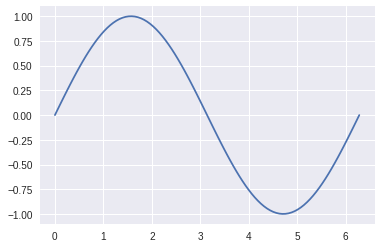

In [0]:
import numpy as np
x = np.linspace(0,2*np.pi,100)
plt.plot(x, np.sin(x))

This should open an interactive plot, where you can scroll around the image, zoom in, return to the "home" position, and even save the file.  Only one interactive plot can be active in a notebook at a time.  You can also generate "static" inline images by replacing the `%matplotlib notebook` magic with `%matplotlib inline`.

In [0]:
%matplotlib inline

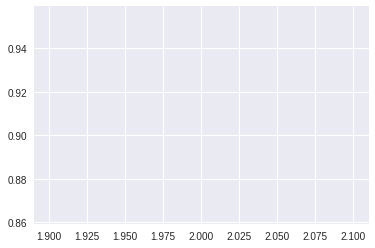

In [0]:
plt.plot(x, np.sin(x))